<a href="https://colab.research.google.com/github/GHLara/Atividade-Pr-tica-Em-Grupo-RA3/blob/main/Atividade_Pr%C3%A1tica_Em_Grupo_RA3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUILHERME HENRIQUE EDUARDO DE LARA PERES
# HENRIQUE ANDERLE SCHULZ 
# RAFAELA DE MIRANDA
# NICOLAS LAMBACK DE PAULO

# Questão 1
1. **Análise de Sinais Sonoros**

   Um microfone registra um sinal sonoro cuja intensidade $I(t)$ varia com o tempo de acordo com a função $I(t) = 20\sin(t) + 50$. O tempo $t$ está em segundos. Determine a intensidade sonora total registrada pelo microfone em um intervalo de 10 segundos.

2. **Aceleração de uma Nave Espacial**

   Uma nave espacial está acelerando de acordo com a seguinte função de aceleração: $a(t) = 10\cos(t) + 30$ m/s², onde $t$ é o tempo em segundos. Determine a mudança total na velocidade da nave nos primeiros 5 segundos.

3. **Cálculo do Consumo de Energia**

   Um servidor de um data center consome energia de acordo com a função $E(t) = 200 + 100\sin(t)$, onde $E$ é a energia em watts e $t$ é o tempo em horas. Calcule o total de energia consumida pelo servidor em 24 horas.

4. **Volume de Líquido em um Reservatório**

   A taxa de fluxo de água entrando em um reservatório em litros por segundo é dada pela função $f(t) = 100 + 20\sin(t)$, onde $t$ é o tempo em segundos. Calcule o total de água que entrou no reservatório nos primeiros 60 segundos.


## Soluções

In [ ]:
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import lagrange
import numpy as np
import math

In [ ]:
x = sp.Symbol('x')
expr = 20 * sp.sin(x) + 50
display(sp.integrate(expr, (x, 0, 10)).evalf())

536.781430581529

In [ ]:
def f(x):
  return 10*np.cos(x) + 30

def integral(x):
  return 30 * x + 10 * np.sin(x)

max = integral(5)
min = integral(0)

X = np.linspace(-2, 8, 100)

x = sp.Symbol('x')
exp = 10*sp.cos(x) + 30
funcao = sp.lambdify(x, exp, 'numpy')
a, b = 0, 5
integral_value = float(sp.integrate(exp, (x, a, b)))

print(f"Resultado: {max - min}")

Numericamente: 140.41075725336862


In [ ]:
t = sp.symbols('t')

def integral(t):
  return 200*t - 100*np.cos(t)

def expression(t):
 return 200 + 20 * np.sin(t)

expr = 200 + 100 * sp.sin(t)
funcao = sp.lambdify(t, expr, 'numpy')
limA, limB = 0, 24
integral_value = float(sp.integrate(expr, (t, limA, limB)))

print(f"Resultado: {integral(24) - integral(0)}")

Resultado: 4857.5820992663


In [ ]:
t = sp.symbols('t')

def integral(t):
  return 100*t - 20*np.cos(t)

def expression(t):
 return 100 + 20 * np.sin(t)

expr = 100 + 20 * sp.sin(t)
funcao = sp.lambdify(t, expr, 'numpy')
limA, limB = 0, 60
integral_value = float(sp.integrate(expr, (t, limA, limB)))
print(f"Resultado: {integral(60) - integral(0)}")

Resultado: 6039.048259608303


# Questão 2
Um veículo autônomo está sendo testado em um circuito fechado. Durante o teste, o veículo registra a sua velocidade em cinco momentos distintos, conforme apresentado na tabela abaixo:

| Tempo (s) | Velocidade (m/s) |
|-----------|------------------|
| 0         | 0                |
| 1         | 3                |
| 2         | 4                |
| 3         | 2                |
| 4         | 0                |

Suponha que a função de velocidade $v(t)$ do veículo possa ser representada por um polinômio $P(t)$ que passa por todos os cinco pontos. O método de Lagrange é uma técnica para encontrar esse polinômio, e pode ser aplicado utilizando a biblioteca `scipy` do Python. Trace os gráficos da velocidade, aceleração e posição em relação ao tempo e marque estes três valores com uma linha vertical em $t=5$s.

0.166666666666667*x**4 - 1.16666666666667*x**3 + 1.33333333333333*x**2 + 2.66666666666667*x

0.666666666666667*x**3 - 3.5*x**2 + 2.66666666666667*x + 2.66666666666667

0.0333333333333333*x**5 - 0.291666666666667*x**4 + 0.444444444444444*x**3 + 1.33333333333333*x**2

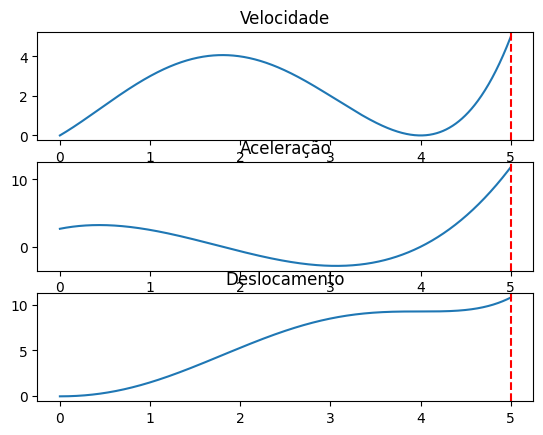

In [ ]:
# Definir os pontos
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 3, 4, 2, 0])
polynomial = lagrange(x, y)

x = sp.symbols('x')
expr = sp.Poly(polynomial, x).as_expr()

# Velocidade
xNum = np.linspace(0, 5, 1000)
ySpeed = [expr.subs(x, val) for val in xNum]

# Aceleração
derivative = sp.diff(expr, x)
yAcl = [derivative.subs(x, val) for val in xNum]

# Deslocamento
antiderivada = sp.integrate(expr, x)
yDesl = [antiderivada.evalf(subs={x: val}) for val in xNum]

display(expr)
display(derivative)
display(antiderivada)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.set_title('Velocidade')
ax1.plot(xNum, ySpeed)
ax1.axvline(x=5, linestyle="--", color='red')

ax2.set_title('Aceleração')
ax2.plot(xNum, yAcl)
ax2.axvline(x=5, linestyle="--", color='red')

ax3.set_title('Deslocamento')
ax3.plot(xNum, yDesl)
ax3.axvline(x=5, linestyle="--", color='red')

plt.show()


Um engenheiro está projetando uma barragem de concreto com a forma de um trapézio retângulo. O projeto do perfil da barragem, olhando de lado, é dado pela função $f(x) = a + b\sin\left(\frac{\pi x}{H}\right)$, onde $x$ é a altura acima da base (em metros), $a$ é a altura mínima da barragem (em metros), e $b$ é a amplitude da variação do perfil (em metros). Por razões de segurança, o perfil da barragem varia sinusoidalmente de $a$ até $a + b$ ao longo da altura.

O engenheiro precisa calcular o volume de concreto necessário para construir a barragem. Ele sabe que o comprimento da barragem é de $L$ metros e que o perfil é o mesmo em todo o seu comprimento.

Ele decide então modelar o volume de concreto necessário como a integral da função $f(x)$, de $0$ até a altura máxima $H$, multiplicada pelo comprimento $L$.

Dadas as seguintes informações:

- $a = 10$ metros
- $b = 5$ metros
- $H = 20$ metros
- $L = 100$ metros

Calcule o volume de concreto necessário para a construção da barragem e trace o gráfico da função que descreve o perfil da barragem e sombreie a área sob a curva que representa o volume de concreto.



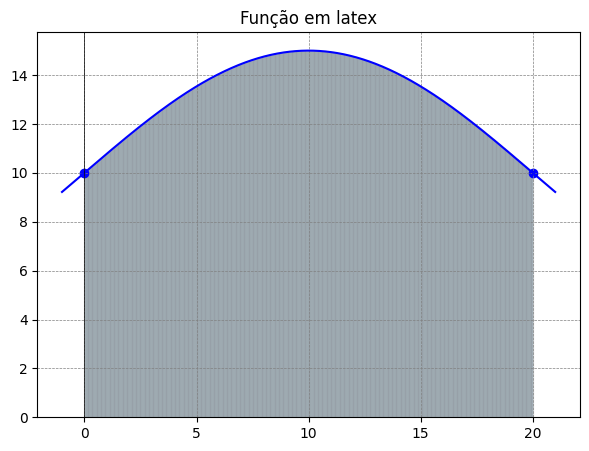

Valor sem multiplicar pela largura: 263.66
Multiplicando pelo comprimento: 26366.19772367581


In [ ]:
x = sp.symbols('x')

def integral(x):
  return 10*(x - (10*np.cos(np.pi*x/20))/np.pi)

def expression(x):
 return 10 + 5 * np.sin(np.pi*x/20)

expr = 10 + 5 * sp.sin(sp.pi*x/20)
funcao = sp.lambdify(x, expr, 'numpy')
limA, limB = 0, 20
integral_value = float(sp.integrate(expr, (x, limA, limB)))

def plot_riemann_sums(N):
    dx = (limB-limA)/N
    x = np.linspace(limA,limB,N+1)
    y = funcao(x)

    plt.figure(figsize=(7,5))

    x_right = x[:-1] 
    y_right = y[:-1]
    plt.bar(x_right, y_right, width=dx, alpha=0.2, align='edge', edgecolor='gray')

    x_curve = np.linspace(limA-1, limB+1, 1000)
    y_curve = funcao(x_curve)

    plt.plot(x_curve, y_curve, 'blue')
    plt.scatter(limA, expression(limA), color='blue')
    plt.scatter(limB, expression(limB), color='blue')

    riemann_sum = np.sum(funcao(x[:-1]) * dx)
    error = np.abs(riemann_sum - integral_value)

    plt.title("Função em latex")

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()

    print(f"Valor sem multiplicar pela largura: {integral(20) - integral(0):.2f}")
    print(f"Multiplicando pelo comprimento: {(integral(20) - integral(0)) * 100}")

plot_riemann_sums(1000)